In [1]:
# Dependencies and Setup
import pandas as pd

In [2]:
# Read mouse and Study result Data File and store into Pandas DataFrames
mouse_df = pd.read_csv('mouse_metadata.csv')
study_df = pd.read_csv('study_results.csv')

In [3]:
# merge the dataframes
df = pd.merge(study_df, mouse_df, on='Mouse ID', how='left')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
import pandas as pd

# Load the data
mouse_metadata = pd.read_csv('mouse_metadata.csv')
study_results = pd.read_csv('study_results.csv')

# Merge the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Check the number of unique mice
unique_mice = len(merged_data['Mouse ID'].unique())
print(f'Number of unique mice: {unique_mice}')

# Check for any Mouse ID with duplicate Timepoints
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# If there are any duplicates, create a new DataFrame where this data is removed
if len(duplicate_mice) > 0:
    cleaned_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]
else:
    cleaned_data = merged_data.copy()

# Display the updated number of unique mice IDs
unique_mice_cleaned = len(cleaned_data['Mouse ID'].unique())
print(f'Number of unique mice after cleaning: {unique_mice_cleaned}')


Number of unique mice: 249
Number of unique mice after cleaning: 248


In [5]:
import numpy as np
from scipy import stats

# Group by the drug regimen
grouped_regimen = cleaned_data.groupby('Drug Regimen')

# Create a DataFrame of summary statistics
summary_statistics = pd.DataFrame({
    'Mean': grouped_regimen['Tumor Volume (mm3)'].mean(),
    'Median': grouped_regimen['Tumor Volume (mm3)'].median(),
    'Variance': grouped_regimen['Tumor Volume (mm3)'].var(),
    'Standard Deviation': grouped_regimen['Tumor Volume (mm3)'].std(),
    'SEM': grouped_regimen['Tumor Volume (mm3)'].apply(stats.sem)  # scipy's stats.sem function can be used to calculate SEM
})

# Display the summary statistics DataFrame
print(summary_statistics)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


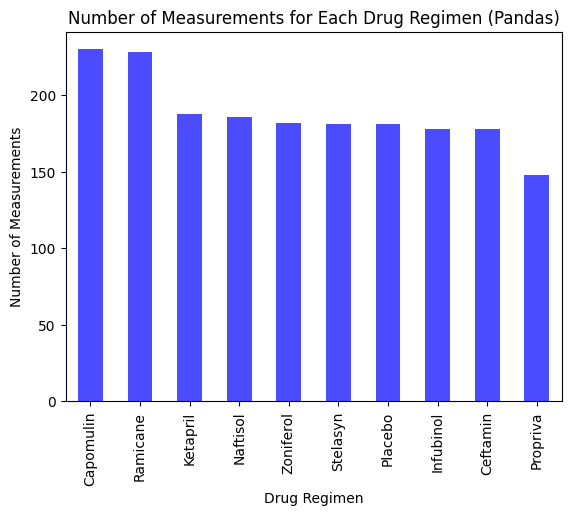

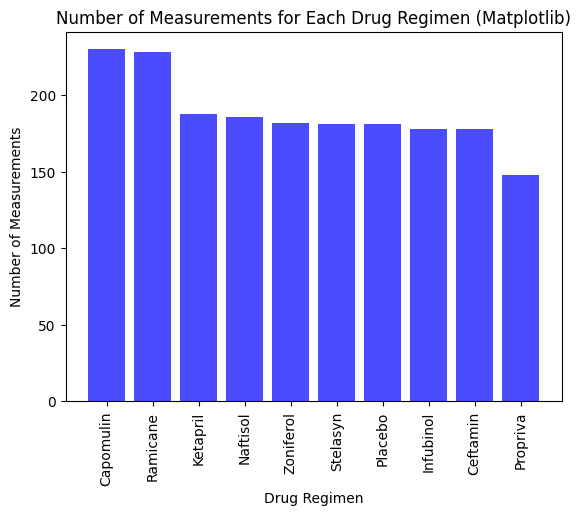

In [6]:
import matplotlib.pyplot as plt

# Using pandas
measurement_count = cleaned_data['Drug Regimen'].value_counts()
measurement_count.plot(kind='bar', color='b', alpha=0.7)
plt.title('Number of Measurements for Each Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.show()

# Using matplotlib
plt.bar(measurement_count.index, measurement_count.values, color='b', alpha=0.7)
plt.title('Number of Measurements for Each Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=90)
plt.show()


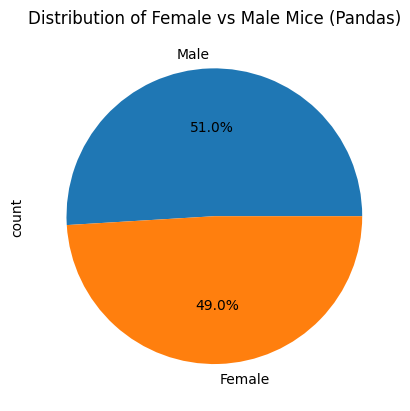

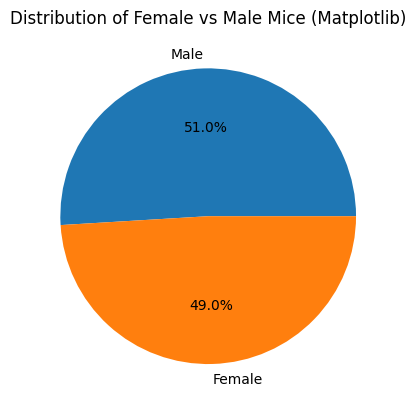

In [7]:
# Using pandas
gender_distribution = cleaned_data['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice (Pandas)')
plt.show()

# Using matplotlib
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice (Matplotlib)')
plt.show()


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0

IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0

IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1

IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0



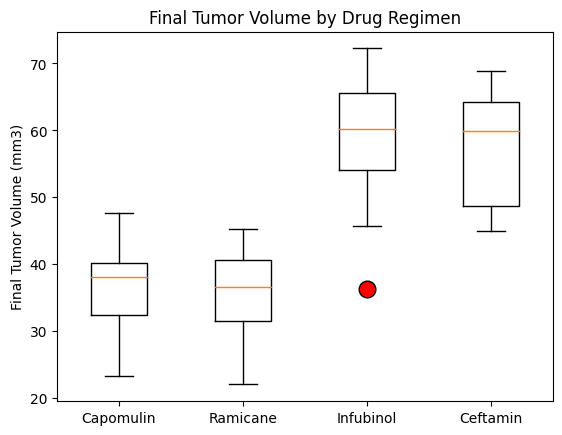

In [8]:
# First, get the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

# Loop through the treatment list
for drug in treatment_list:
    # Get the tumor volume for the mice treated with this drug
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Append the final tumor volume to the list
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate and print the IQR for this drug
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Determine outliers using upper and lower bounds
    outliers_count = (final_tumor_vol.loc[(merged_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                          (merged_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}\n')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops={'markerfacecolor': 'r', 'markersize': 12})
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


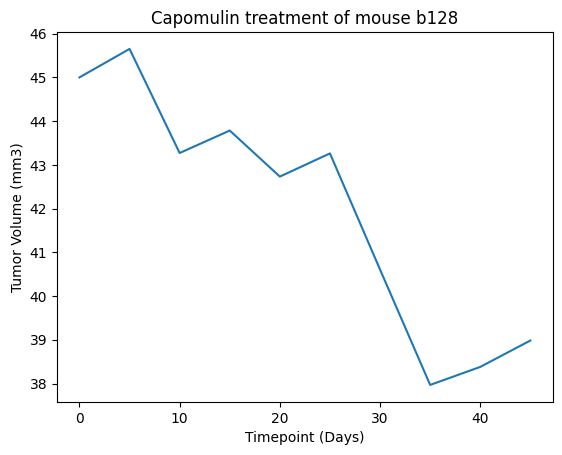

In [9]:
# First, let's select a mouse that was treated with Capomulin
capomulin_mouse = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin'].iloc[0]['Mouse ID']

# Next, let's get the data for this mouse
capomulin_mouse_data = cleaned_data.loc[cleaned_data['Mouse ID'] == capomulin_mouse]

# Generate a line plot of time point versus tumor volume for this mouse
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse ' + capomulin_mouse)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


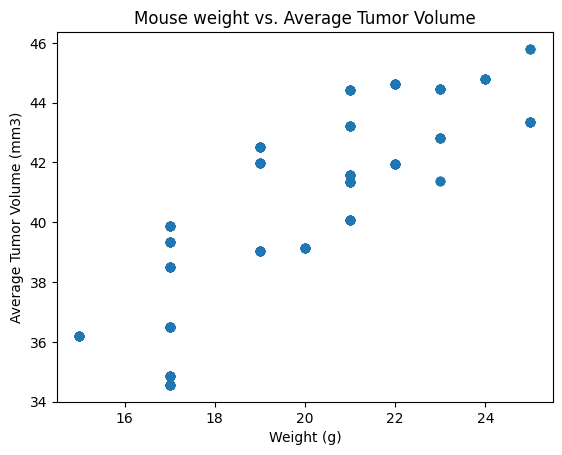

In [10]:
# Get the data for all mice treated with Capomulin
capomulin_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge this data with the original dataframe to get the corresponding weight for each mouse
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID')

# Generate a scatter plot of mouse weight versus average tumor volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_y'])
plt.title('Mouse weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


In [11]:
capomulin_avg = capomulin_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

The correlation between mouse weight and the average tumor volume is 0.841936342469472


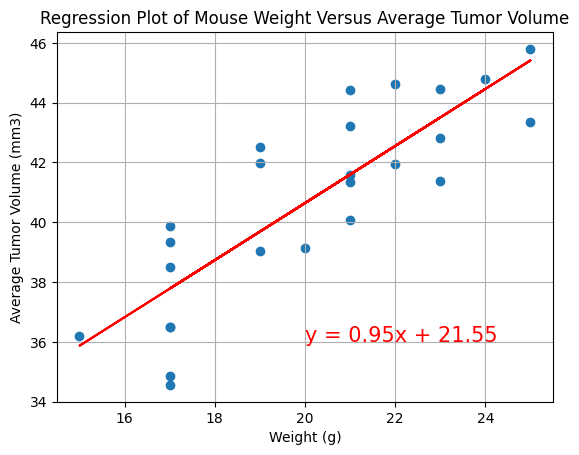

In [12]:
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]}")

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
regress_values = capomulin_avg['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()
